In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import os
import datetime
from datetime import date
from datetime import time
from datetime import datetime
import seaborn as sns
import scipy as sp
import random
import time
import sklearn
import matplotlib as mpl
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier 
## common model helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import feature_extraction
from sklearn import model_selection
from sklearn import metrics
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
path = 'H:/data/titanic'
os.chdir(path)
os.getcwd()
data_raw = pd.read_csv('train.csv', sep = ',')
data_val = pd.read_csv('test.csv', sep = ',')
data1 = data_raw.copy(deep = True)
data_cleaner = [data1, data_val]
print('Train columns with null values:\n', data1.isnull().sum())
print("-"*10)

print('Test columns with null values:\n',data_val.isnull().sum())
print("-"*10)
data_cleaner = [data1, data_val]
## treat missing values
for dataset in data_cleaner:
    
    dataset["Age"].fillna(dataset["Age"].median(), inplace = True)
    
    dataset["Embarked"].fillna(dataset["Embarked"].mode()[0], inplace = True)
    
    dataset["Fare"].fillna(dataset["Fare"].median(), inplace = True)

drop_column = ['PassengerId','Ticket','Cabin']

data1.drop (drop_column, axis =1, inplace = True)
    
print(data1.isnull().sum())
print(data_val.isnull().sum())

for i in data_cleaner:
    
    i["Age"].fillna(i["Age"].median(), inplace = True)
    
    i["Embarked"].fillna(i["Embarked"].mode()[0], inplace = True)
    
    i["Fare"].fillna(i["Fare"].median(), inplace = True)


    
print(data1.isnull().sum())
print(data_val.isnull().sum())

for dataset in data_cleaner:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['IsAlone'] = 1
    dataset['IsAlone'].loc[dataset['FamilySize'] >1 ] = 0
    dataset['Title'] = dataset['Name'].str.split(", ", expand = True)[1].str.split(".", expand = True)[0]
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)
    
    stat_min = 10
title_names = (data1['Title'].value_counts()<stat_min)
data1['Title'] = data1['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(data1['Title'].value_counts())

## convert objects to category using label encoder
label = LabelEncoder()
for dataset in data_cleaner:
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])
## define y variable
Target  = ['Survived']
#define x variables for original features aka feature selection
data1_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] #pretty name/values for charts
data1_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare'] #coded for algorithm calculation
data1_xy =  Target + data1_x

#define x variables for original w/bin features to remove continuous variables
data1_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
data1_xy_bin = Target + data1_x_bin
print('Bin X Y: ', data1_xy_bin, '\n')

#define x and y variables for dummy features original
data1_dummy = pd.get_dummies(data1[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy
print('Dummy X Y: ', data1_xy_dummy, '\n')

## train test split
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1[data1_x_calc], data1[Target], random_state = 0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(data1[data1_x_bin], data1[Target] , random_state = 0)
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy], data1[Target], random_state = 0)

## data sets
train1_x, test1_x, train1_y, test1_y 
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin 
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
Test columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
----------
Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64
Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch

C:\Users\HP\Anaconda2\envs\py36\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


(     Pclass  SibSp  Parch   Age      Fare  FamilySize  IsAlone  Sex_female  \
 105       3      0      0  28.0    7.8958           1        1           0   
 68        3      4      2  17.0    7.9250           7        0           1   
 253       3      1      0  30.0   16.1000           2        0           0   
 320       3      0      0  22.0    7.2500           1        1           0   
 706       2      0      0  45.0   13.5000           1        1           1   
 271       3      0      0  25.0    0.0000           1        1           0   
 424       3      1      1  18.0   20.2125           3        0           0   
 752       3      0      0  33.0    9.5000           1        1           0   
 615       2      1      2  24.0   65.0000           4        0           1   
 2         3      0      0  26.0    7.9250           1        1           1   
 882       3      0      0  22.0   10.5167           1        1           1   
 467       1      0      0  56.0   26.5500          

In [126]:
path = 'H:/data/titanic'
os.chdir(path)
os.getcwd()
train  = pd.read_csv('train.csv', sep = ',')
test = pd.read_csv('test.csv', sep = ',')
#Checking for missing data
NAs = pd.concat([train.isnull().sum()], axis=1, keys=['Train'])
NAs[NAs.sum(axis=1) > 0]
train.pop('Cabin')
train.pop('Name')
train.pop('Ticket')
train.shape
# Filling missing Age values with mean
train['Age'] = train['Age'].fillna(train['Age'].mean())
# Filling missing Embarked values with most common value
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
train['Pclass'] = train['Pclass'].apply(str)
# Getting Dummies from all other categorical vars
for col in train.dtypes[train.dtypes == 'object'].index:
    for_dummy = train.pop(col)
    train = pd.concat([train, pd.get_dummies(for_dummy, prefix=col)], axis=1)
train.head()
labels = train.pop('Survived')
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, labels, test_size=0.25)

In [127]:
train.head()

,PassengerId,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,2,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,3,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,4,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,5,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [91]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn import metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV   #Performing grid search
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

## definition moel fit
def modelfit(alg, train_features, train_labels, performCV = True, printFeatureImportance = True, cv_folds = 5):

    ## fit the algorithm on the data
    alg.fit(train_features, train_labels)
    ## predict on training set
    train_pred = alg.predict(train_features)
    train_predprob = alg.predict_proba(train_features)[:,1]
    
    ## perform cross cv
    if performCV:
        cv_score = model_selection.cross_val_score(alg, train_features, train_labels, cv = cv_folds, scoring = 'roc_auc')
        
    if printFeatureImportance:
        feat_imp = pd.Series(gbm0.feature_importances_, [x for x in train.columns]).sort_values(ascending = False)
        feat_imp.plot(kind = 'bar', title = 'feature importances')
        plt.ylabel('Feature Importance Score')
        
    #Print model report:
    print  ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(train_labels, train_pred))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(train_labels, train_predprob))
    
    
    print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" 
               % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    





Model Report
Accuracy : 0.9147
AUC Score (Train): 0.970331
CV Score : Mean - 0.8599902 | Std - 0.02371117 | Min - 0.8265306 | Max - 0.8867833


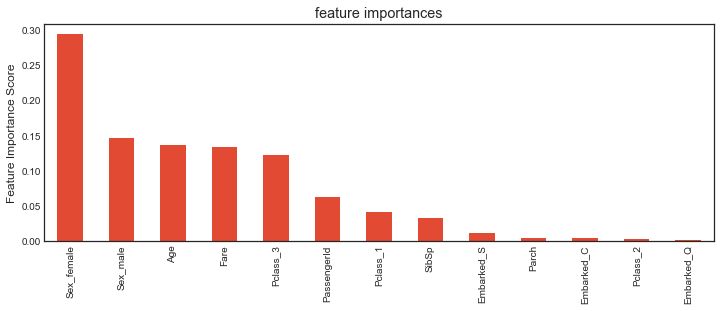

In [128]:
## cerate a base model
gbm0 = GradientBoostingClassifier(random_state= 10)

## train on train data
modelfit(gbm0, x_train, y_train )
## print feature importance



Model Report
Accuracy : 0.9596
AUC Score (Train): 0.994505
CV Score : Mean - 0.8136113 | Std - 0.02643534 | Min - 0.7768421 | Max - 0.8547368


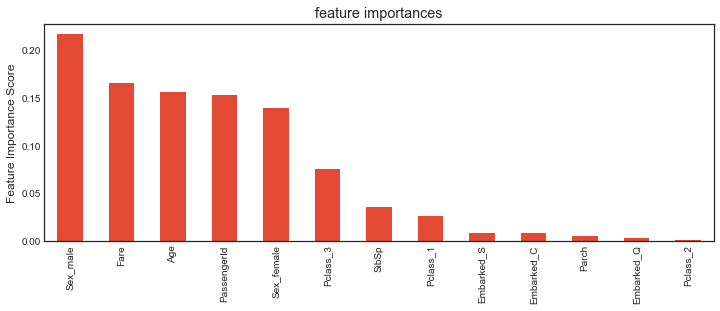

In [132]:
## train on test data
modelfit(gbm0, x_test, y_test)

In [ ]:
##Choose a relatively high learning rate. Generally the default value of 0.1 works but somewhere between 0.05 to 0.2 should work for different problems

## Determine the optimum number of trees for this learning rate. 
## This should range around 40-70. Remember to choose a value on which your system can work fairly fast. This is because it will be used for testing various scenarios and determining the tree parameters.
## Tune tree-specific parameters for decided learning rate and number of trees. 
## Lower the learning rate and increase the estimators proportionally to get more robust models.

## min_samples_split = 500 : This should be ~0.5-1% of total values. 
## imbalanced class problem, we’ll take a small value from the range.
## min_samples_leaf = 50 : Can be selected based on intuition. This is just used for preventing overfitting 
  ##and again a small value because of imbalanced classes.
## max_depth = 8 : Should be chosen (5-8) based on the number of observations and predictors. 
##This has 87K rows and 49 columns so lets take 8 here.
##max_features = ‘sqrt’ : Its a general thumb-rule to start with square root.
##subsample = 0.8 : This is a commonly used used start value

In [ ]:
param_test1 = {'n_estimators': range(20, 100, 200)}
gsearch1 = GridSearchCV(estimator= GradientBoostingClassifier(learning_rate=0.001, min_samples_split= 5, 
                                                              min_samples_leaf= 5, max_depth= 4, max_features = None, subsample = 0.8,
                                                             random_state = 10), param_grid = param_test1, scoring = 'roc_auc', n_jobs =4, cv = 5)

gsearch1.fit(x_train, y_train)

from sklearn.model_selection import GridSearchCV
## create param_ grid
param_grid =  { 'n_estimators': [100, 200, 300],
    'max_depth': [2, 3, 4, 5],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12]
    }

## create a  base model
gbm = GradientBoostingClassifier()
grid_search = GridSearchCV(estimator= gbm, param_grid=param_grid, cv = 5, n_jobs= -1, verbose=2)


In [ ]:
modelfit(grid_search, x_train, y_train)

## no need to parameter tune as we get 99%